The Intuition of Bagging
The secret sauce of a Random Forest is a process called Bootstrap Aggregating, or Bagging.

If we trained 100 trees on the exact same data, they would all give the exact same answer. That’s not a forest; that’s just a copy-paste. To get different perspectives, we give each tree a slightly different version of the dataset.

Bootstrapping: We create a new dataset for each tree by randomly picking rows from your original Wine dataset with replacement.

Some wine samples might appear twice in a tree's training set.

Some wine samples might not appear at all (these are called Out-of-Bag samples).

Aggregating: When it's time to predict if a wine is "Good" or "Bad," all 100 trees vote. The majority wins.

Coding the Random Forest

importing the libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [10]:
df=pd.read_csv("WineQT.csv")

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [12]:
x=df.drop('quality',axis=1)
y=(df['quality']>5).astype(int)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Initialize the Random Forest
n_estimators: Number of trees in the forest
random_state: Ensures we get the same results every time

In [15]:
rf_model=RandomForestClassifier(n_estimators=100,max_depth=6,random_state=42)

Train the model

In [17]:
rf_model.fit(x_train_scaled,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

Make predictions

In [18]:
rf_preds=rf_model.predict(x_test_scaled)

Evaluate

In [19]:
print(f"Random Forest Accuracy:{accuracy_score(y_test,rf_preds):.4f}")

Random Forest Accuracy:0.7424


What to look for: Compare this accuracy to your Day 12 Decision Tree ($Accuracy \approx 0.71-0.73$). Usually, the Forest will be $2-5\%$ higher immediately, even without heavy tuning.

In Day 11, you used SHAP to see that Alcohol and Volatile Acidity were the main drivers. Random Forests have a built-in way to calculate this called Gini Importance. It measures how much each feature decreases the "impurity" across all 100 trees.

In [25]:
import matplotlib.pyplot as plt

Get feature importances from the model

In [26]:
importances=rf_model.feature_importances_
feature_names=x.columns

Create a Series for easy plotting

In [27]:
forest_importances=pd.Series(importances,index=feature_names).sort_values(ascending=False)

Plotting

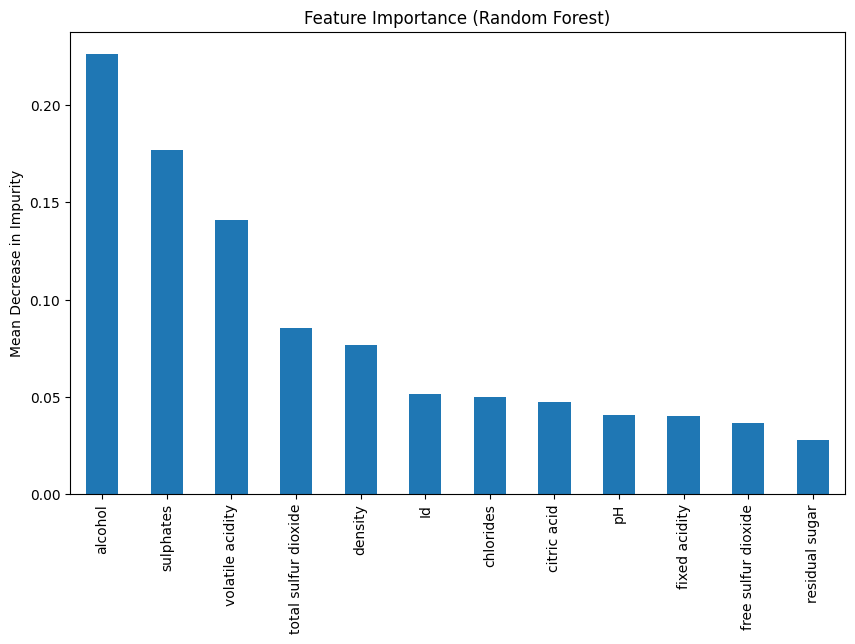

In [28]:
plt.figure(figsize=(10,6))
forest_importances.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Mean Decrease in Impurity")
plt.show()

In [30]:
train_preds = rf_model.predict(x_train_scaled)
test_preds = rf_model.predict(x_test_scaled)

print(f"--- Day 13: Random Forest Results ---")
print(f"Training Accuracy: {accuracy_score(y_train, train_preds):.4f}")
print(f"Test Accuracy:     {accuracy_score(y_test, test_preds):.4f}")

--- Day 13: Random Forest Results ---
Training Accuracy: 0.8807
Test Accuracy:     0.7424


The Goal: On Day 12, an unpruned tree likely hit 100% Training Accuracy but much lower Test Accuracy (e.g., 72%). With the Random Forest, you should see the gap between Training and Test accuracy shrink. This means your model is generalizing better.

Feature Importance

Random Forests are famous for their ability to rank features. This is a built-in alternative to the SHAP values you did on Day 11.

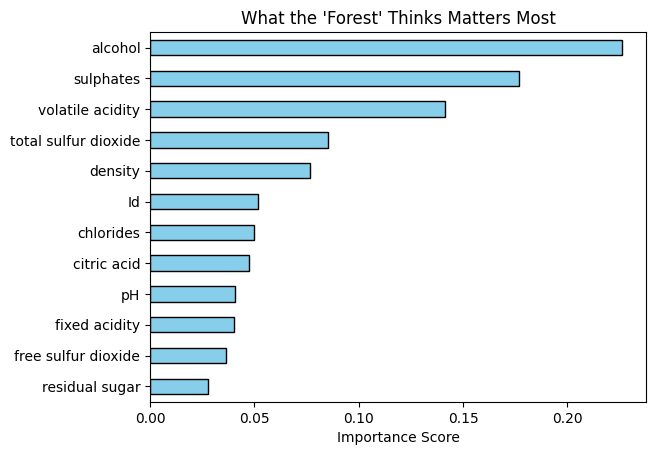

In [31]:
importances = rf_model.feature_importances_
features = x.columns

# Sort them for better visualization
feat_importances = pd.Series(importances, index=features).sort_values(ascending=True)

# Plot
feat_importances.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("What the 'Forest' Thinks Matters Most")
plt.xlabel("Importance Score")
plt.show()

[ ] Did the accuracy improve? (Usually, it does).

[ ] Is the overfitting under control? (Is the Test score closer to the Train score than before?)

[ ] Who is the winner? (Does the Forest agree that Alcohol is the #1 predictor of quality?)